KNOU Machine Learning  
# Chapter 14. Reinforcement Learning

Bowon KWON  
2024년 12월 8일 생성

## **1. 강화학습 개요**



### **1.1 머신러닝에서의 위치**
- **강화학습**은 머신러닝의 주요 유형 중 하나로, **지도학습**, **비지도학습**, **준지도학습**과는 차별화된 특징을 가짐
- 학습은 행동에 따라 주어지는 **보상**(reward)에 기반하여 진행
- 예측 목표값 없이 행동과 보상 데이터를 통해 누적 보상을 최대화하는 방향으로 학습
- **활용 분야**:
  - **게임**: AlphaGo, Atari, StarCraft
  - **로봇 제어**: 모방 학습
  - **시스템 설정 및 최적화**


### **1.2 주요 요소**

- **에이전트**: 학습을 수행하는 주체
- **환경**: 에이전트가 상호작용하는 대상
- **상태** ($S$): 특정 시점에서 환경의 정보
- **행동** ($A$): 에이전트가 수행할 수 있는 선택
- **보상** ($R$): 행동의 결과로 얻는 피드백
- **정책** ($\pi$): 주어진 상태에서 행동을 선택하는 규칙
- **마르코프 성질**: 현재 상태가 다음 상태 결정에 유일하게 영향을 미침


### **1.3 수학적 모델링**

- **강화학습 문제**는 **마르코프 결정 프로세스**(Markov Decision Process, MDP)로 정의됨

- **MDP 구성요소**:
  - $S$: 유한한 상태 집합
  - $A$: 유한한 행동 집합
  - $P$: 상태 전이 확률, $P(s' \mid s, a)$
  - $R$: 보상 함수, $R(s, a)$
  - $\gamma$: 할인율 ($0 < \gamma < 1$)

- **목표**: 최적의 정책 $\pi^*$을 찾아 누적 보상 $G_t = R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \cdots$를 최대화

<br>

---

**상태 가치 함수**
- 특정 상태 $s$에서 시작하여 정책 $\pi$를 따를 때 얻을 것으로 기대되는 누적 보상
- 수식:
  $$
  v_\pi(s) = \mathbb{E}_\pi \left[ \sum_{t=0}^\infty \gamma^t R_t \mid S_0 = s \right]
  $$
- **의미**: 상태 $s$의 "가치"를 평가하는 데 사용되며, 상태 중심의 문제를 해결할 때 활용

---

**행동 가치 함수**
- 특정 상태 $s$에서 특정 행동 $a$를 선택하고 이후 정책 $\pi$를 따를 때 얻을 것으로 기대되는 누적 보상
- 수식:
  $$
  q_\pi(s, a) = \mathbb{E}_\pi \left[ \sum_{t=0}^\infty \gamma^t R_t \mid S_0 = s, A_0 = a \right]
  $$
- **의미**: 상태-행동 쌍 $(s, a)$의 "가치"를 평가하며, 행동 중심의 문제를 해결할 때 활용

---

**최적 정책 $\pi^*$ 찾기**
- 최적 정책은 **최적 상태 가치 함수**와 **최적 행동 가치 함수**를 통해 정의
- **최적 상태 가치 함수**:
  - 가능한 모든 정책 중에서 상태 $s$에서 최대 기대 보상을 제공하는 가치 함수
  - 수식:
    $$
    v^*(s) = \max_\pi v_\pi(s)
    $$

- **최적 행동 가치 함수**:
  - 가능한 모든 정책 중에서 상태-행동 쌍 $(s, a)$에서 최대 기대 보상을 제공하는 가치 함수
  - 수식:
    $$
    q^*(s, a) = \max_\pi q_\pi(s, a)
    $$

- **최적 정책 $\pi^*$**는 다음과 같이 정의됨:
  - 상태 $s$에서 $q^*(s, a)$를 최대화하는 행동 $a$를 선택하는 정책  
$$
\pi^*(s) = \arg\max_a q^*(s, a)
$$
- 이를 통해 에이전트는 주어진 환경에서 최적의 행동을 선택할 수 있음


## **2. 강화학습의 적용 사례**




### **2.1 AlphaGo와 AlphaZero**
- **AlphaGo**: 강화학습과 딥러닝의 결합으로 바둑 세계 챔피언을 이김
- **AlphaZero**: AlphaGo를 일반화하여 체스, 장기 등 모든 보드 게임에 적용 가능
  - **관련 논문**: [Silver et al., "Mastering the game of Go with deep neural networks and tree search"](https://www.nature.com/articles/nature16961)

### **2.2 Atari 게임**

- **DQN(Deep Q-Network)**을 활용하여 다양한 비디오 게임에서 놀라운 성능 달성
  - **참고 논문**: [Mnih et al., "Playing Atari with Deep Reinforcement Learning"](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)


### **2.3 로봇 제어**

- **모방 학습** 및 강화학습 기술로 복잡한 작업 제어 가능
  - **예제 영상**: [DeepMind Control Suite](https://youtu.be/Q4bMcUk6pcw)


In [1]:
# 강화학습 기본 구현: 간단한 미로 찾기 문제
import numpy as np

# 환경 정의
class MazeEnvironment:
    def __init__(self):
        self.state_space = 16  # 상태의 총 개수
        self.action_space = ['U', 'D', 'L', 'R']  # 상, 하, 좌, 우
        self.goal_state = 15  # 목표 지점
        self.current_state = 0  # 초기 상태

    def step(self, action):
        """
        현재 상태에서 action 수행.
        Args:
            action (str): 선택한 행동 ('U', 'D', 'L', 'R')
        Returns:
            next_state (int): 다음 상태
            reward (int): 보상 값
            done (bool): 종료 여부
        """
        # 상태 전이 및 보상 계산 (간단화된 로직)
        if self.current_state == self.goal_state:
            return self.current_state, 1, True  # 목표 도달 시 종료

        next_state = self.current_state + 1 if action == 'R' else self.current_state  # 임의 전이
        reward = 1 if next_state == self.goal_state else -1  # 목표 도달 보상, 실패 패널티
        self.current_state = next_state
        done = self.current_state == self.goal_state
        return next_state, reward, done

# 환경 초기화
env = MazeEnvironment()
state, reward, done = env.step('R')  # 예시로 'R' 행동 수행
print(f"다음 상태: {state}, 보상: {reward}, 종료 여부: {done}")


다음 상태: 1, 보상: -1, 종료 여부: False


## **3. Q-학습과 심층 Q-신경망**

### **3.1 Q-학습 개요**
- **Q-학습(Q-Learning)**: 에이전트가 **Q-함수**를 학습하여 최적 정책 $\pi^*$를 찾는 강화학습 기법
- **Q-함수**:
  - 상태 $s$에서 행동 $a$를 선택했을 때의 기대 누적 보상
  - 수식:
    $$
    Q(s, a) = \mathbb{E}[G_t \mid S_t = s, A_t = a]
    $$
- **Q-테이블**:
  - 상태-행동 쌍 $(s, a)$의 Q-값을 테이블 형태로 저장
  - 작은 상태 공간에서는 효과적이나, 복잡한 환경에서는 비효율적



### **3.2 Q-학습 알고리듬**

- **핵심 알고리듬**:
  - Q-함수 업데이트:
    $$
    Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]
    $$
    - $\alpha$: 학습률 (Learning Rate)
    - $\gamma$: 할인율 (Discount Factor)
    - $r$: 즉각적인 보상

- **탐험과 탐사 $\epsilon$-탐욕 전략**:
  - 강화학습에서 탐험과 탐사를 조화롭게 수행하기 위한 방법
  - **탐험(Exploration)**: 무작위로 행동을 선택하여 새로운 상태와 보상을 탐색
  - **탐사(Exploitation)**: 현재의 Q값이 최대인 행동을 선택하여 이미 학습된 정보를 활용
  - **구현 방식**:
    - 확률 $\epsilon$으로 무작위 행동 선택 (탐험)
    - 확률 $1 - \epsilon$로 최적 Q-값을 따르는 행동 선택 (탐사)
    - 학습 초기에는 $\epsilon$ 값을 크게 설정하여 탐험 위주로 진행하고, 점진적으로 감소시켜 탐사 위주로 전환
  - **수식** ($|A|$는 가능한 행동의 개수):     

$$
\text{P}(a \mid s) =
\begin{cases}
1 - \epsilon & \text{if } a = \arg\max_{a'} Q(s, a') \\
\frac{\epsilon}{|A|} & \text{otherwise}
\end{cases}
$$

In [2]:
# Q-학습 구현 예제
import numpy as np
import random

# 환경 초기화
class SimpleGrid:
    def __init__(self):
        self.grid_size = 4
        self.state_space = self.grid_size ** 2
        self.action_space = ['U', 'D', 'L', 'R']
        self.goal_state = (3, 3)
        self.state = (0, 0)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'U' and x > 0:
            x -= 1
        elif action == 'D' and x < self.grid_size - 1:
            x += 1
        elif action == 'L' and y > 0:
            y -= 1
        elif action == 'R' and y < self.grid_size - 1:
            y += 1

        self.state = (x, y)
        reward = 1 if self.state == self.goal_state else -0.1
        done = self.state == self.goal_state
        return self.state, reward, done

# Q-학습 알고리듬
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.state_space, len(env.action_space)))

    for episode in range(episodes):
        state = env.reset()
        done = False

        while not done:
            current_state_idx = state[0] * env.grid_size + state[1]
            if random.uniform(0, 1) < epsilon:
                action_idx = random.choice(range(len(env.action_space)))  # 탐험
            else:
                action_idx = np.argmax(Q[current_state_idx])  # 탐사

            action = env.action_space[action_idx]
            next_state, reward, done = env.step(action)
            next_state_idx = next_state[0] * env.grid_size + next_state[1]

            # Q 업데이트
            Q[current_state_idx, action_idx] += alpha * (
                reward + gamma * np.max(Q[next_state_idx]) - Q[current_state_idx, action_idx]
            )

            state = next_state

    return Q

# 환경과 알고리듬 실행
env = SimpleGrid()
q_table = q_learning(env)
print("학습된 Q-테이블:\n", q_table)


학습된 Q-테이블:
 [[ 0.00185436 -0.04618178 -0.06269429  0.18098   ]
 [ 0.10565654  0.3122     -0.02477343 -0.05471998]
 [-0.06237672  0.1788903  -0.06734903 -0.06183459]
 [-0.0385219  -0.02558478 -0.04200129 -0.03940399]
 [-0.08334709  0.2180826  -0.09708462 -0.06652582]
 [ 0.12802785  0.458      -0.03275643  0.14001614]
 [-0.04192974  0.53898635  0.04488562  0.06513949]
 [-0.019       0.56833922 -0.021601   -0.0199    ]
 [-0.0545099  -0.08232799 -0.05378177  0.44058092]
 [ 0.17676146  0.14140248  0.10409187  0.62      ]
 [ 0.06158275  0.48614957  0.34118953  0.8       ]
 [ 0.1023434   1.          0.42404069  0.72542969]
 [-0.0471934  -0.04900995 -0.04900995 -0.02534776]
 [ 0.02785213 -0.0199     -0.04349841  0.52170926]
 [-0.01543123  0.07029011 -0.01501151  0.96184796]
 [ 0.          0.          0.          0.        ]]


### **3.3 심층 Q-신경망(Deep Q-Network, DQN)**

- **Q-테이블의 한계**:
  - 상태 공간이 크거나 연속적인 경우 확장성 문제 발생

- **DQN 소개**:
  - 심층 신경망으로 Q-함수를 근사
  - 주요 개선:
    - **경험 재현(Experience Replay)**: 데이터 상관관계 제거
    - **목표망(Target Network)**: 학습 안정성 강화

- **DQN 수식**:
  - 학습 대상:    
$$
Q(s, a; \theta) = r + \gamma \max_{a'} Q(s', a'; \theta')
$$


### **관련 논문**
  * [Mnih et al., "Human-level control through deep reinforcement learning"](https://www.nature.com/articles/nature14236)
    - DQN 알고리듬의 설계와 개선 사항(예: 경험 재생, 타겟 네트워크 사용 등)을 상세히 설명
    - 다양한 Atari 2600 게임에서 인간 수준의 성능을 달성했음을 보임

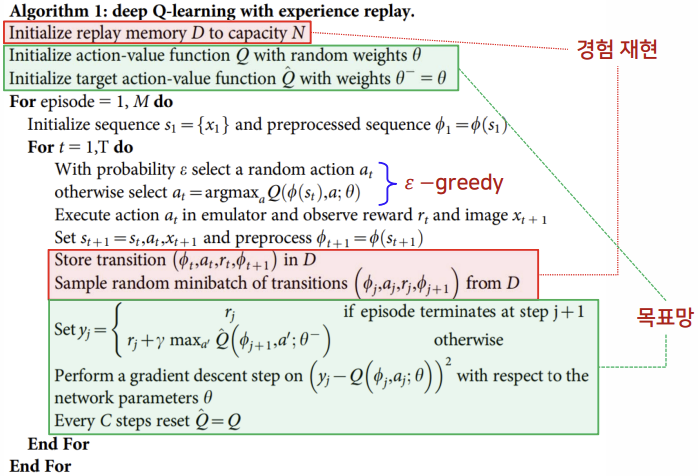

[**Figure 1:**](https://www-nature-com-ssl.libproxy.snu.ac.kr/articles/nature14236/figures/1) **Schematic illustration of the convolutional neural network**    

<br>


  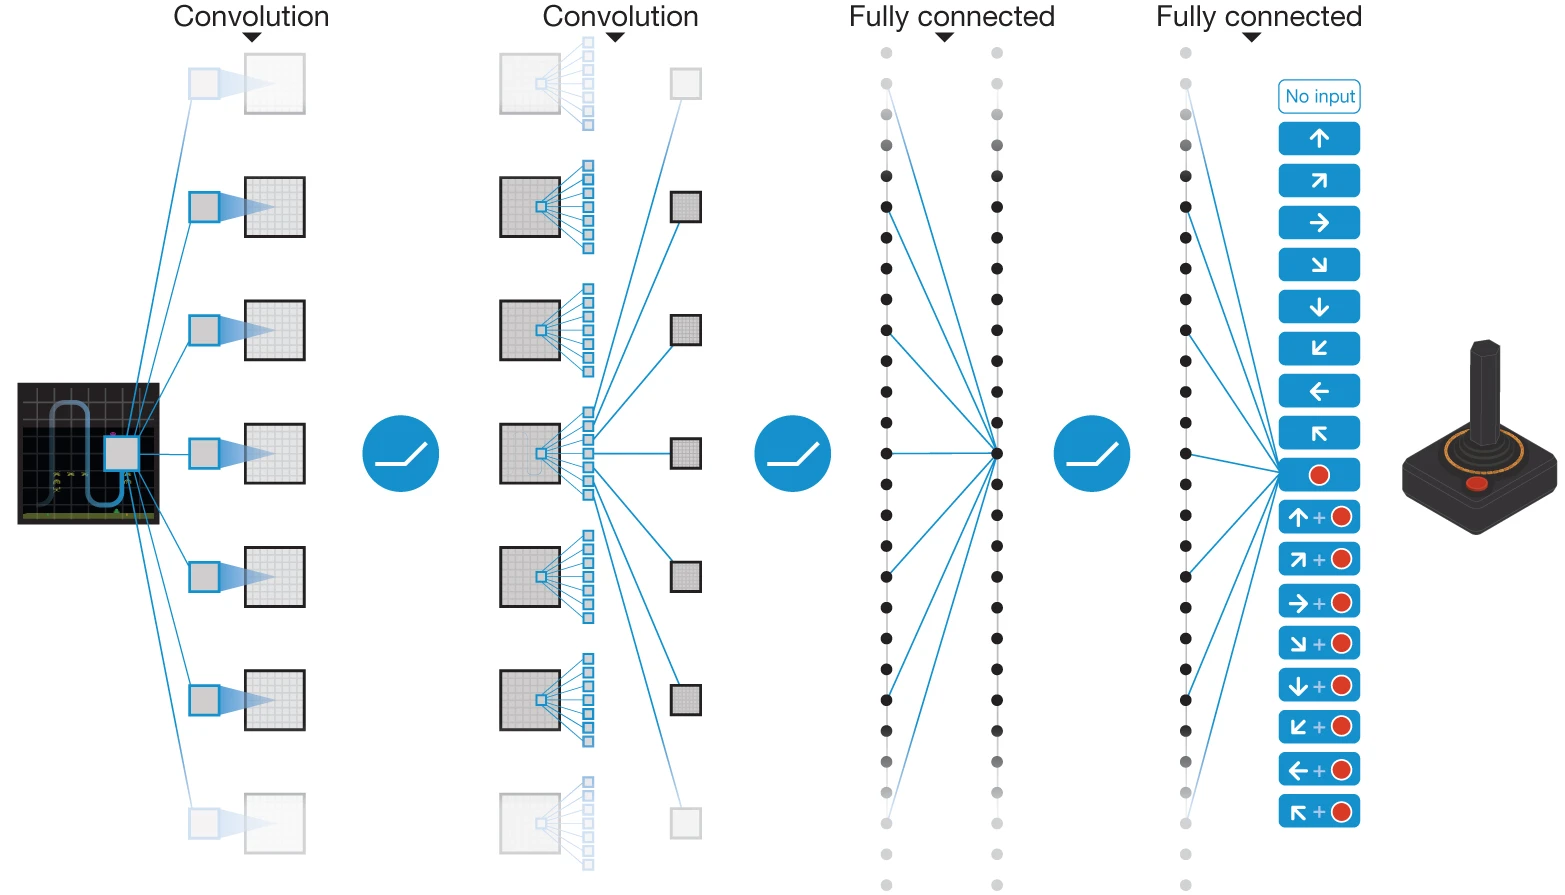

[**Figure 3:**](https://www-nature-com-ssl.libproxy.snu.ac.kr/articles/nature14236/figures/3) **Comparison of the DQN agent with the best reinforcement learning methods15 in the literature**

<br>

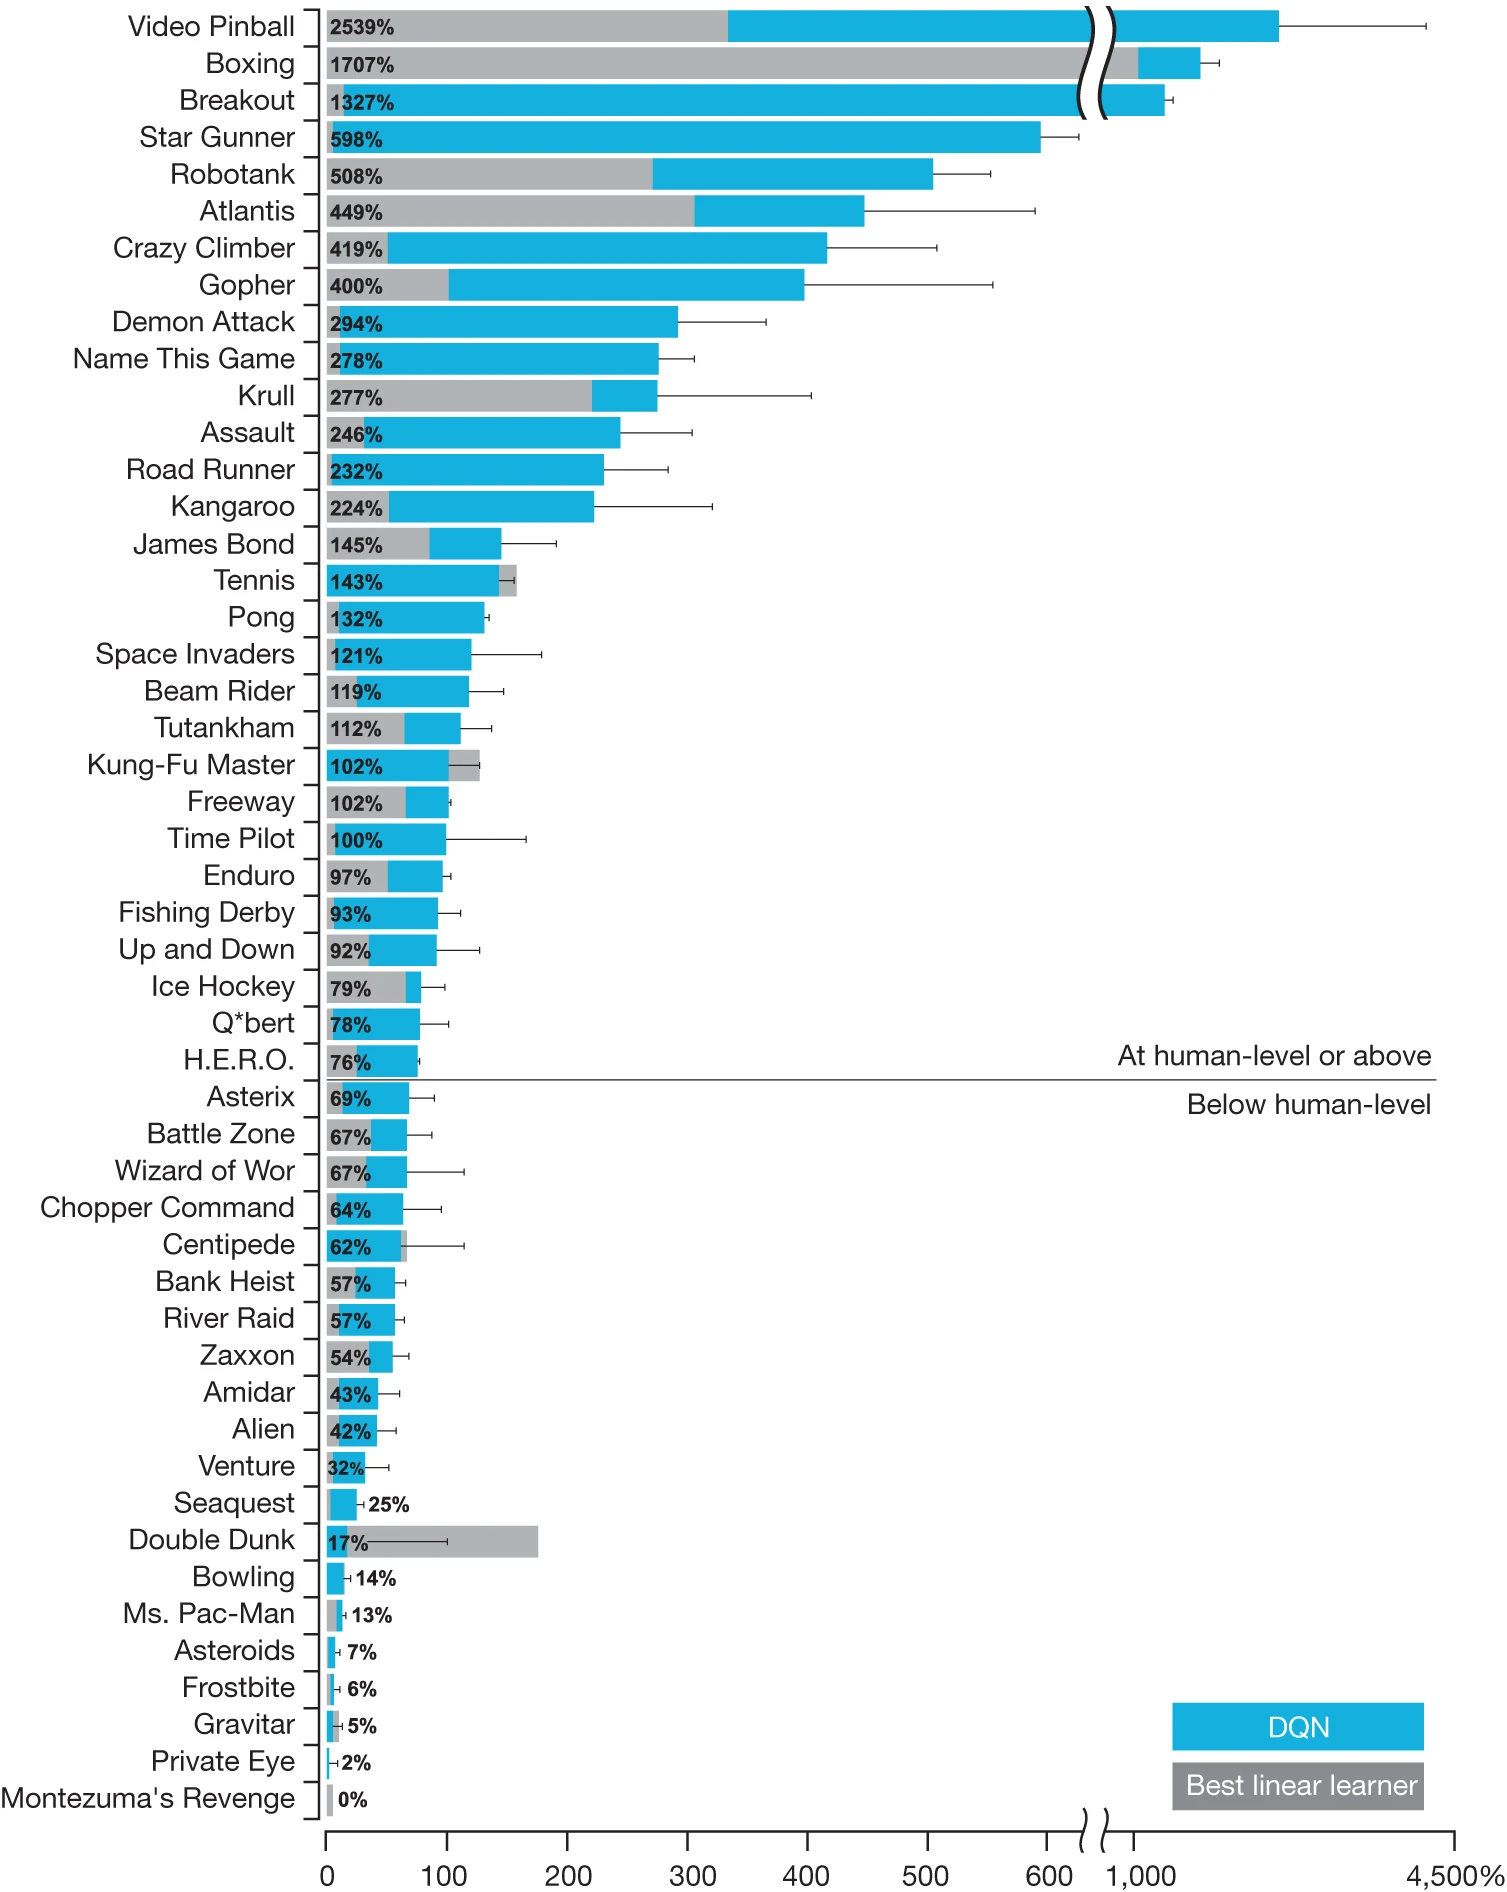

In [5]:
import numpy as np
import tensorflow as tf
from collections import deque
import random

# DQN 환경 설정
class SimpleEnvironment:
    def __init__(self):
        self.state_space = 4  # 상태 공간의 크기 (예: 4개의 상태)
        self.action_space = 2  # 행동 공간의 크기 (예: 2개의 행동)
        self.current_state = 0  # 초기 상태 설정

    def reset(self):
        # 환경을 초기화하고 초기 상태를 반환
        self.current_state = 0
        return np.array([self.current_state] * self.state_space)  # 상태를 state_space 크기로 반환

    def step(self, action):
        # 행동을 수행하고 새로운 상태, 보상, 종료 여부 반환
        reward = 1 if action == self.current_state % 2 else -1  # 간단한 보상 계산
        self.current_state += 1
        done = self.current_state >= self.state_space  # 종료 조건
        next_state = np.array([self.current_state % self.state_space] * self.state_space)  # 상태 반환 크기 수정
        return next_state, reward, done

# DQN 모델 정의
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size  # 상태 공간 크기
        self.action_size = action_size  # 행동 공간 크기
        self.memory = deque(maxlen=2000)  # 경험 재현 메모리 초기화
        self.gamma = 0.95  # 할인율
        self.epsilon = 1.0  # 탐험 비율 초기값
        self.epsilon_min = 0.01  # 탐험 비율 최소값
        self.epsilon_decay = 0.995  # 탐험 비율 감소율
        self.learning_rate = 0.001  # 학습률
        self.model = self._build_model()  # DQN 모델 생성

    def _build_model(self):
        # 심층 신경망 모델 정의
        model = tf.keras.Sequential()
        model.add(tf.keras.Input(shape=(self.state_size,)))  # Input 레이어 추가
        model.add(tf.keras.layers.Dense(24, activation='relu'))  # 은닉층 1
        model.add(tf.keras.layers.Dense(24, activation='relu'))  # 은닉층 2
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))  # 출력층
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss='mse')  # 모델 컴파일
        return model

    def remember(self, state, action, reward, next_state, done):
        # 경험 데이터를 메모리에 저장
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        # 행동 선택 (탐험 또는 탐사)
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # 탐험: 무작위 행동 선택
        q_values = self.model.predict(state, verbose=0)  # 탐사: Q값 기반 행동 선택
        return np.argmax(q_values[0])  # Q값이 최대인 행동 반환

    def replay(self, batch_size):
        # 경험 재현을 통해 모델 학습
        minibatch = random.sample(self.memory, batch_size)  # 메모리에서 랜덤 샘플링
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])  # 타겟 Q값 계산
            target_f = self.model.predict(state, verbose=0)  # 현재 Q값
            target_f[0][action] = target  # 타겟값 갱신
            self.model.fit(state, target_f, epochs=1, verbose=0)  # 모델 업데이트
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay  # 탐험 비율 감소

# DQN 학습 실행
if __name__ == "__main__":
    env = SimpleEnvironment()  # 환경 생성
    state_size = env.state_space  # 상태 공간 크기
    action_size = env.action_space  # 행동 공간 크기
    agent = DQNAgent(state_size, action_size)  # 에이전트 생성
    episodes = 200  # 학습 에피소드 수
    batch_size = 32  # 배치 크기

    for e in range(episodes):
        state = env.reset()  # 환경 초기화
        state = np.reshape(state, [1, state_size])  # 상태를 입력 형태로 변환
        for time in range(500):
            action = agent.act(state)  # 행동 선택
            next_state, reward, done = env.step(action)  # 행동 수행
            next_state = np.reshape(next_state, [1, state_size])  # 새로운 상태 변환
            agent.remember(state, action, reward, next_state, done)  # 경험 저장
            state = next_state  # 상태 업데이트
            if done:
                print(f"에피소드 {e+1}/{episodes}, 시간 {time+1}, 탐험 비율 {agent.epsilon:.2f}")
                break  # 에피소드 종료
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)  # 경험 재현을 통한 학습


에피소드 1/200, 시간 4, 탐험 비율 1.00
에피소드 2/200, 시간 4, 탐험 비율 1.00
에피소드 3/200, 시간 4, 탐험 비율 1.00
에피소드 4/200, 시간 4, 탐험 비율 1.00
에피소드 5/200, 시간 4, 탐험 비율 1.00
에피소드 6/200, 시간 4, 탐험 비율 1.00
에피소드 7/200, 시간 4, 탐험 비율 1.00
에피소드 8/200, 시간 4, 탐험 비율 1.00
에피소드 9/200, 시간 4, 탐험 비율 1.00
에피소드 10/200, 시간 4, 탐험 비율 0.99
에피소드 11/200, 시간 4, 탐험 비율 0.99
에피소드 12/200, 시간 4, 탐험 비율 0.99
에피소드 13/200, 시간 4, 탐험 비율 0.98
에피소드 14/200, 시간 4, 탐험 비율 0.98
에피소드 15/200, 시간 4, 탐험 비율 0.97
에피소드 16/200, 시간 4, 탐험 비율 0.97
에피소드 17/200, 시간 4, 탐험 비율 0.96
에피소드 18/200, 시간 4, 탐험 비율 0.96
에피소드 19/200, 시간 4, 탐험 비율 0.95
에피소드 20/200, 시간 4, 탐험 비율 0.95
에피소드 21/200, 시간 4, 탐험 비율 0.94
에피소드 22/200, 시간 4, 탐험 비율 0.94
에피소드 23/200, 시간 4, 탐험 비율 0.93
에피소드 24/200, 시간 4, 탐험 비율 0.93
에피소드 25/200, 시간 4, 탐험 비율 0.92
에피소드 26/200, 시간 4, 탐험 비율 0.92
에피소드 27/200, 시간 4, 탐험 비율 0.91
에피소드 28/200, 시간 4, 탐험 비율 0.91
에피소드 29/200, 시간 4, 탐험 비율 0.90
에피소드 30/200, 시간 4, 탐험 비율 0.90
에피소드 31/200, 시간 4, 탐험 비율 0.90
에피소드 32/200, 시간 4, 탐험 비율 0.89
에피소드 33/200, 시간 4, 탐험 비율 0.89
에피소드 34/200, 시간 4, 